# 회원정보

In [ ]:
import pandas as pd

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')
df.columns

---

기본 정보 그룹:
- 기준년월, ID, 남녀구분코드, 연령

회원 상태 및 신용 관련 그룹:
- 회원여부_이용가능_카드론, 소지여부_신용, 소지카드수_유효_신용, 소지카드수_이용가능_신용, 입회일자_신용, 입회경과개월수_신용, 회원여부_연체

이용 및 거래 거절 관련 그룹:
- 이용거절여부_카드론, 탈회횟수_누적, 최종탈회후경과월

카드 사용 가능성 및 사용 패턴 그룹:
- 이용가능카드수_신용체크, 이용금액_R3M_신용체크, 이용금액_R3M_신용, 이용금액_R3M_신용_가족, 이용금액_R3M_체크, 이용금액_R3M_체크_가족

주요 카드 사용 내역 그룹:
- _1순위카드이용금액, _1순위카드이용건수, _1순위신용체크구분

### 기본 정보 그룹
---

In [1]:
# 기본 정보 그룹
columns_to_select = [
    "기준년월",
    "ID",
    "남녀구분코드",
    "연령"
]

filtered_df = df[columns_to_select]
print(filtered_df.head())


NameError: name 'df' is not defined

### 기본 통계 요약 
---

#### 연령 분포 시각화

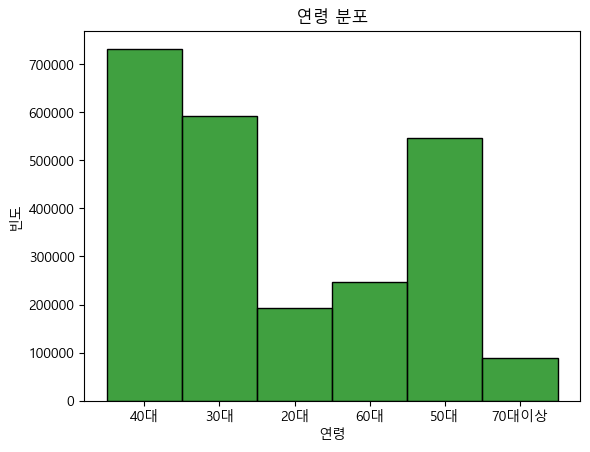

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

sns.histplot(filtered_df["연령"], bins=10, color="green")
plt.title("연령 분포")
plt.xlabel("연령")
plt.ylabel("빈도")
plt.show()

### 남녀 비율 확인

In [ ]:
gender_counts = filtered_df["남녀구분코드"].value_counts()
print("남녀 비율:\n", gender_counts)

남녀 비율:
 남녀구분코드
1    1255308
2    1144692
Name: count, dtype: int64


#### 남녀 비율 시각화

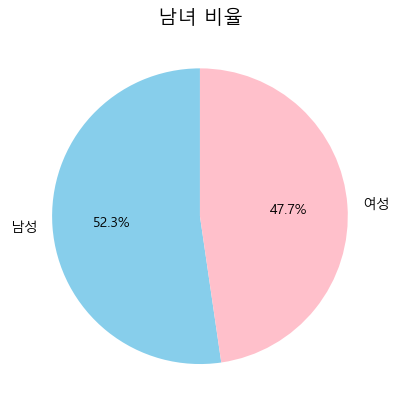

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 남녀 비율 계산
gender_counts = df["남녀구분코드"].value_counts()

# 파이 차트 생성
fig, ax = plt.subplots()
gender_labels = ["남성", "여성"]
ax.pie(
    gender_counts,
    labels=gender_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=["skyblue", "pink"]
)
ax.set_title("남녀 비율", fontsize=14)  # 제목 설정
plt.show()


### 기준년월별 데이터 개수 확인

In [ ]:
month_counts = filtered_df["기준년월"].value_counts()
print("기준년월별 데이터 개수:\n", month_counts)

기준년월별 데이터 개수:
 기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64


기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64


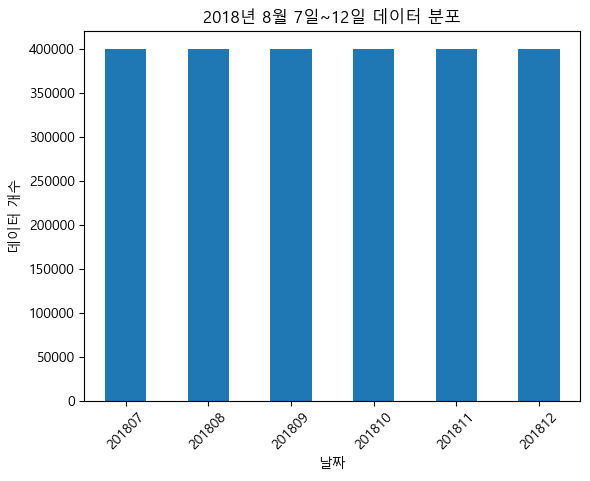

In [ ]:
# 날짜별 데이터 개수 집계
date_counts = filtered_df['기준년월'].value_counts().sort_index()

# 결과 출력
print(date_counts)

# 시각화 (막대그래프)
date_counts.plot(kind='bar')
plt.xlabel('날짜')
plt.ylabel('데이터 개수')
plt.title('2018년 8월 7일~12일 데이터 분포')
plt.xticks(rotation=45)
plt.show()

### 회원 상태 및 신용 관련 그룹
---

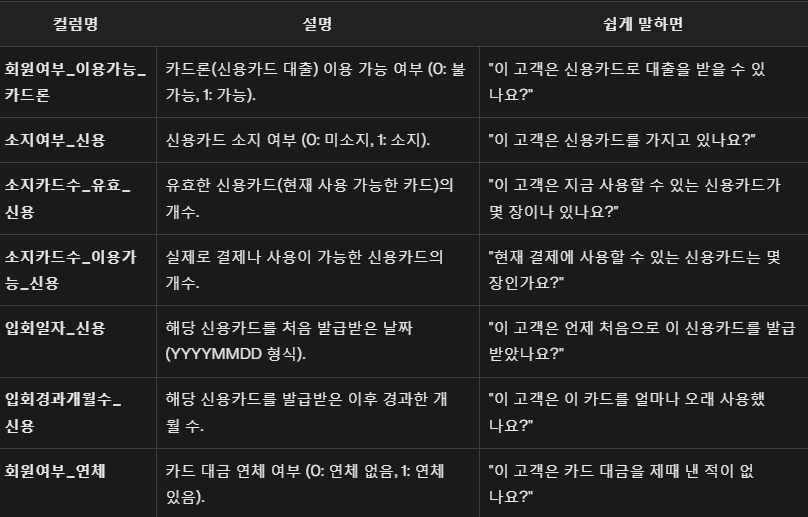

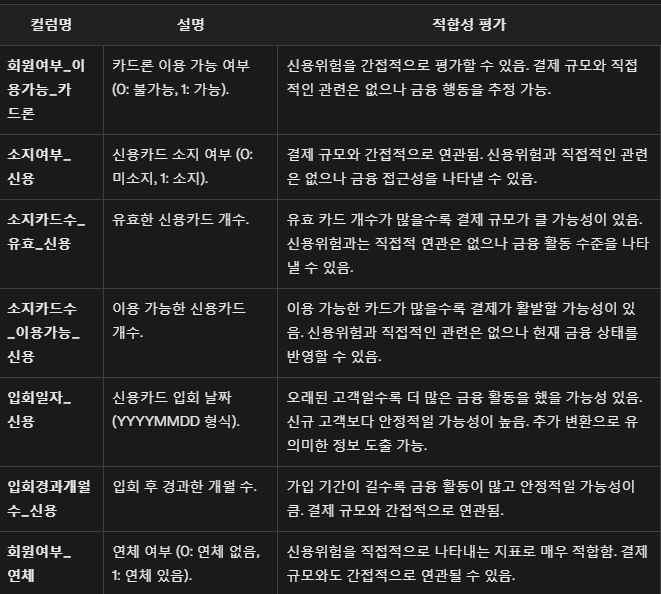

In [ ]:
# 회원 상태 및 신용 관련 그룹:

columns_to_select = [
    "회원여부_이용가능_카드론",
    "소지여부_신용",
    "소지카드수_유효_신용",
    "소지카드수_이용가능_신용",
    "입회일자_신용",
    "입회경과개월수_신용",
    "회원여부_연체"
]

filtered_df = df[columns_to_select]
print(filtered_df.head())

   회원여부_이용가능_카드론  소지여부_신용  소지카드수_유효_신용  소지카드수_이용가능_신용   입회일자_신용  입회경과개월수_신용  \
0              0        1            1              1  20130101          67   
1              1        1            1              1  20170801          12   
2              0        1            1              1  20080401         124   
3              0        1            2              2  20160501          27   
4              1        1            1              1  20180601           2   

   회원여부_연체  
0        0  
1        0  
2        0  
3        0  
4        0  


### 입회 경과 개월수 분포 
→ 회원들이 가입 후 얼마나 오랜 기간 동안 활동했는지에 대한 경향을 확인할 수 있습니다.

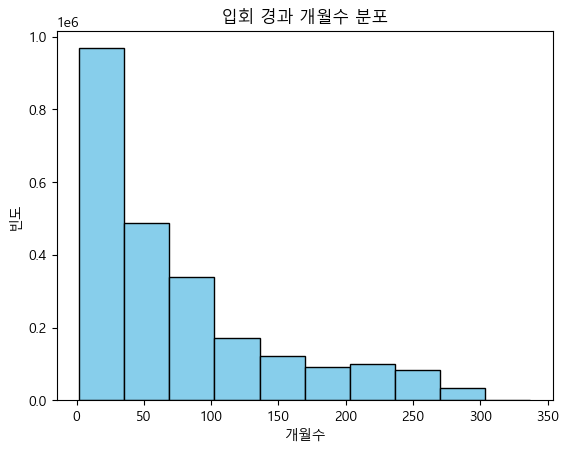

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.hist(df['입회경과개월수_신용'], bins=10, color='skyblue', edgecolor='black')
plt.title('입회 경과 개월수 분포')
plt.xlabel('개월수')
plt.ylabel('빈도')
plt.show()


### 신규 가입자 비중이 매우 높음
그래프의 왼쪽(0~50개월 구간)에 데이터가 집중되어 있으며, 특히 0~10개월 구간에서 가장 높은 빈도를 보입니다.

이는 최근에 신용카드를 발급받은 신규 가입자가 많다는 것을 의미합니다.

---

### 장기 가입자의 비중이 낮음
그래프의 오른쪽(150개월 이상)으로 갈수록 빈도가 급격히 줄어들며, 장기 가입자(200개월 이상)는 극소수에 불과합니다.

이는 고객이 장기간 신용카드를 유지하지 않거나, 탈회 또는 비활성화 상태로 전환되는 경우가 많음을 시사합니다.

#### 소지카드수 및 입회경과개월수 분포 시각화

---

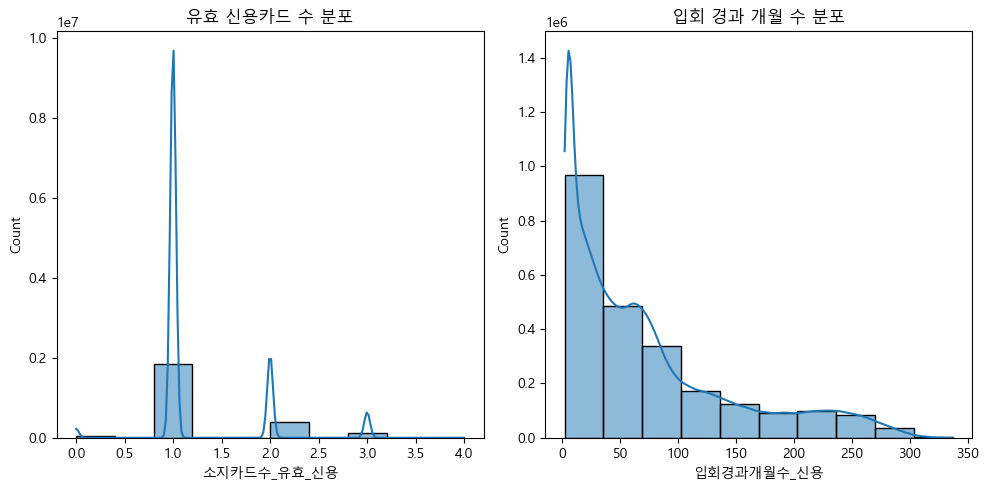

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['소지카드수_유효_신용'], bins=10, kde=True)
plt.title('유효 신용카드 수 분포')

plt.subplot(1, 2, 2)
sns.histplot(df['입회경과개월수_신용'], bins=10, kde=True)
plt.title('입회 경과 개월 수 분포')

plt.tight_layout()
plt.show()

##### [ 유효 신용카드 수 분포 ]
- 대부분의 고객은 유효한 신용카드를 한 장만 소지하고 있음

##### [ 입회 경과 개월 수 분포 ]
- 신규 가입자 비중이 높음
- 장기 가입자 비중이 낮음

### 연체 여부에 따른 유효 신용카드 수 비교 

→ 연체 여부(0: 없음, 1: 있음)에 따른 유효 신용카드 수의 분포를 시각화

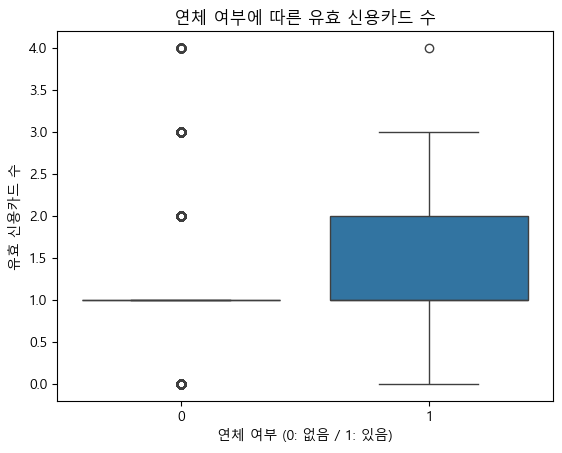

In [ ]:
# 연체 여부에 따른 유효 신용카드 수 비교
sns.boxplot(x='회원여부_연체', y='소지카드수_유효_신용', data=df)
plt.title('연체 여부에 따른 유효 신용카드 수')
plt.xlabel('연체 여부 (0: 없음 / 1: 있음)')
plt.ylabel('유효 신용카드 수')
plt.show()

- 연체가 있는 사람들은 보통 더 많은 유효 신용카드를 가지고 있고, 데이터 분포도 더 넓으며 이상치도 많다는 것을 알 수 있습니다. 
- 반면, 연체가 없는 사람들은 유효 신용카드 수가 적은 편이고 데이터가 상대적으로 안정적으로 분포되어 있습니다.

### 이용 및 거래 거절 관련 그룹
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

df = pd.read_csv('병합된 데이터\\1_회원정보_merged.csv')

# 이용 및 거래 거절 관련 그룹
columns_to_select = [
    "이용거절여부_카드론",
    "탈회횟수_누적",
    "최종탈회후경과월"
]

filtered_df = df[columns_to_select]
print(filtered_df.head())

   이용거절여부_카드론  탈회횟수_누적  최종탈회후경과월
0           0        1        61
1           0        1        98
2           0        1        60
3           0        1       100
4           0        1       101


#### 탈회횟수 누적 
---

In [13]:
print(filtered_df["탈회횟수_누적"].value_counts())

탈회횟수_누적
0    1403785
1     759487
2     236728
Name: count, dtype: int64


- 값 0: 탈회횟수_누적이 0인 경우(즉, 탈회한 적이 없는 고객)가 1,403,785명입니다.

- 값 1: 탈회횟수_누적이 1인 경우(즉, 한 번 탈회한 고객)가 759,487명입니다.

- 값 2: 탈회횟수_누적이 2인 경우(즉, 두 번 탈회한 고객)가 236,728명입니다.

In [14]:
value_counts = filtered_df["탈회횟수_누적"].value_counts()
total_count = value_counts.sum()
percentages = (value_counts / total_count) * 100
print(percentages)

탈회횟수_누적
0    58.491042
1    31.645292
2     9.863667
Name: count, dtype: float64


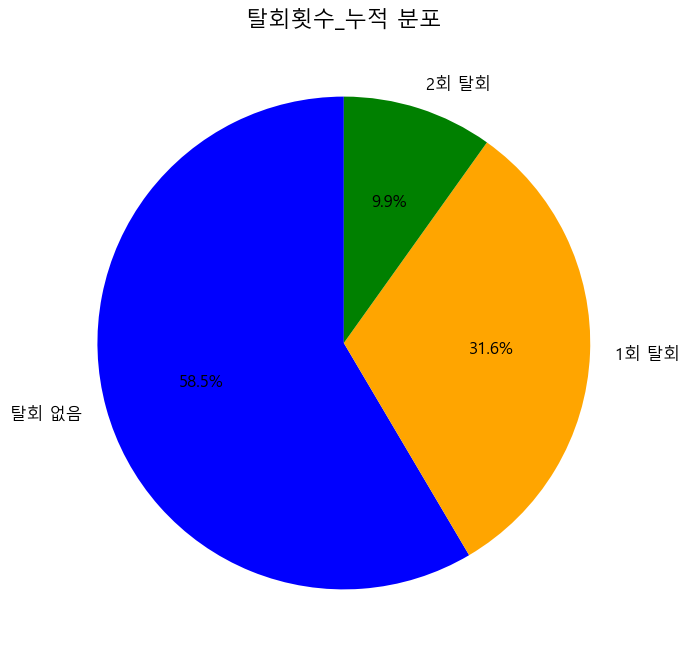

In [19]:
labels = ['탈회 없음', '1회 탈회', '2회 탈회']

plt.figure(figsize=(8, 8))
plt.pie(
    value_counts, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=['blue', 'orange', 'green'], 
    startangle=90,
    textprops={'fontsize': 12}  
)
plt.title("탈회횟수_누적 분포", fontsize=16)
plt.show()

#### 이용거절여부_카드론
---

In [22]:
print(filtered_df["이용거절여부_카드론"].value_counts())

이용거절여부_카드론
0    1925770
1     474230
Name: count, dtype: int64


- 값 0: 총 1,925,770개 (카드론 이용 거절되지 않은 경우)

- 값 1: 총 474,230개 (카드론 이용 거절된 경우)

값이 0인 경우: 카드론 이용이 거절되지 않은 고객.

값이 1인 경우: 카드론 이용이 거절된 고객.


In [23]:
total = 1925770 + 474230
ratio_0 = 1925770 / total * 100  # 카드론 이용 거절되지 않은 비율
ratio_1 = 474230 / total * 100   # 카드론 이용 거절된 비율

print(f"카드론 이용 거절되지 않은 비율: {ratio_0:.2f}%")
print(f"카드론 이용 거절된 비율: {ratio_1:.2f}%")


카드론 이용 거절되지 않은 비율: 80.24%
카드론 이용 거절된 비율: 19.76%


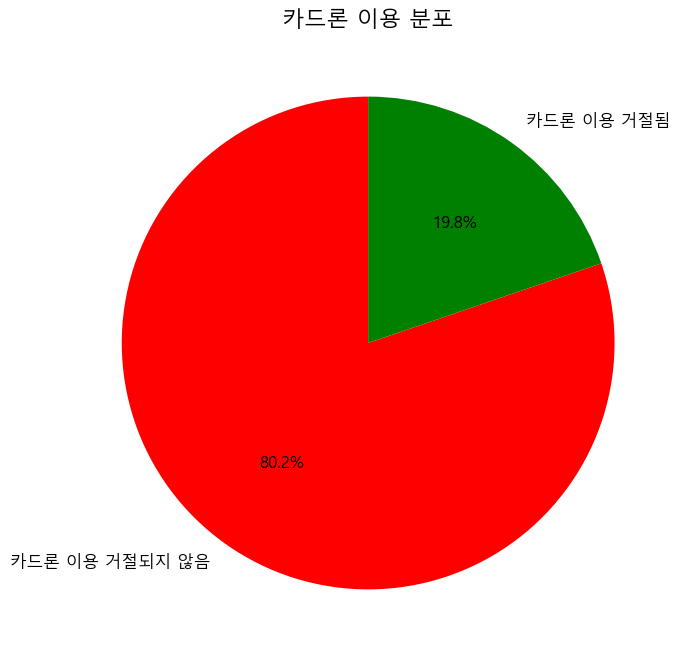

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

ratios = [ratio_0, ratio_1]

labels = ['카드론 이용 거절되지 않음', '카드론 이용 거절됨']
colors = ['red', 'green']

plt.figure(figsize=(8, 8))
plt.pie(
    ratios, 
    labels=labels, 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90,
    textprops={'fontsize': 12}
)
plt.title("카드론 이용 분포", fontsize=16)
plt.show()


### 카드 사용 가능성 및 사용 패턴 그룹
---

In [12]:
# 카드 사용 가능성 및 사용 패턴 그룹
columns_to_select = [
    "이용가능카드수_신용체크",
    "이용금액_R3M_신용체크",
    "이용금액_R3M_신용",
    "이용금액_R3M_체크"
]


filtered_df = df[columns_to_select]
print(filtered_df.head(20))


    이용가능카드수_신용체크  이용금액_R3M_신용체크  이용금액_R3M_신용  이용금액_R3M_체크
0              2            196          196            0
1              1          13475        13475            0
2              2          23988        23988            0
3              3           3904         3904            0
4              2           1190            0         1190
5              1              0            0            0
6              1          10571        10571            0
7              2           3463         3463            0
8              7         124967       121279         3687
9              1              0            0            0
10             1          21001        21001            0
11             2          20212        20212            0
12             5          78873        78873            0
13             3          42290        42290            0
14             2          11050        11050            0
15             0              0            0            0
16            

이용금액 값이 너무 작아서 얼마 단위인지 확인

In [6]:
max_value = filtered_df['이용금액_R3M_신용체크'].max()
mean_value = filtered_df['이용금액_R3M_신용체크'].mean()

print(f"최대값: {max_value}")
print(f"평균값: {mean_value}")


최대값: 235195
평균값: 16937.4483575


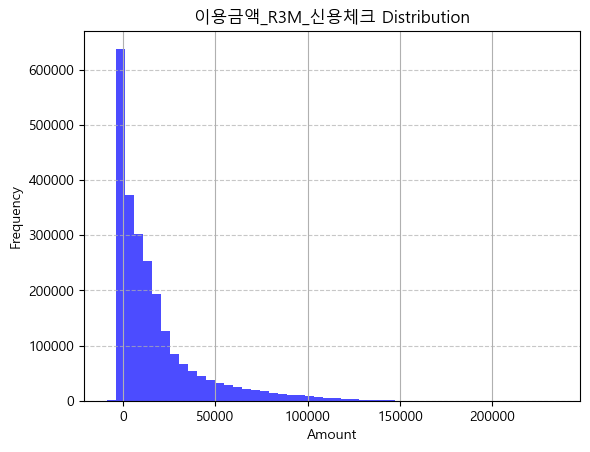

In [ ]:
import matplotlib.pyplot as plt
filtered_df['이용금액_R3M_신용체크'].hist(bins=50, color='blue', alpha=0.7)
plt.title('이용금액_R3M_신용체크 Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [8]:
# 소액 소비자 그룹 (하위 25%)
low_spenders = filtered_df[filtered_df['이용금액_R3M_신용체크'] <= filtered_df['이용금액_R3M_신용체크'].quantile(0.25)]

# 고액 소비자 그룹 (상위 25%)
high_spenders = filtered_df[filtered_df['이용금액_R3M_신용체크'] >= filtered_df['이용금액_R3M_신용체크'].quantile(0.75)]

print("소액 소비자 수:", len(low_spenders))
print("고액 소비자 수:", len(high_spenders))


소액 소비자 수: 600057
고액 소비자 수: 600029


In [ ]:
filtered_df['이용금액_R3M_신용체크'] = filtered_df['이용금액_R3M_신용체크'] * 1000

print(filtered_df['이용금액_R3M_신용체크'].describe())


count    2.400000e+06
mean     1.693745e+07
std      2.324759e+07
min     -8.749000e+06
25%      4.320000e+05
50%      8.879000e+06
75%      2.179300e+07
max      2.351950e+08
Name: 이용금액_R3M_신용체크, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_25456\2052250022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['이용금액_R3M_신용체크'] = filtered_df['이용금액_R3M_신용체크'] * 1000


- 평균값과 중앙값 비교:   
평균값(16,937,448원)이 중앙값(8,879,000원)보다 높습니다.   
이는 일부 고액 소비자가 전체 평균을 끌어올리고 있음을 나타냅니다.  

- 표준편차:
표준편차가 약 23,247,590원으로 매우 크며,   
이는 소비 금액의 변동성이 크다는 것을 보여줍니다.  

- 음수 값 (min):
최소값이 음수(-8,749,000원)로 나타났습니다.   
이는 환불 처리된 금액이나 데이터 오류일 가능성이 있으므로 별도로 처리해야 합니다.  

- 사분위수:
하위 25%의 소비자는 약 432,000원 이하를 사용했으며,   
상위 25%는 약 21,793,000원 이상을 사용했습니다.  

In [10]:
mean_value = filtered_df['이용금액_R3M_신용체크'].mean()
median_value = filtered_df['이용금액_R3M_신용체크'].median()

print(f"평균값: {mean_value}, 중앙값: {median_value}")


평균값: 16937448.3575, 중앙값: 8879000.0


### 주요 카드 사용 내역 그룹
---

In [ ]:
# 주요 카드 사용 내역 그룹
columns_to_select = [
    "_1순위카드이용금액",
    "_1순위신용체크구분",
    "_1순위카드이용건수"
]


filtered_df = df[columns_to_select]
print(filtered_df.tail(10))


         _1순위카드이용금액 _1순위신용체크구분  _1순위카드이용건수
2399990           0         신용          -2
2399991        5959         신용           0
2399992           0         신용           1
2399993       27792         신용         177
2399994         458         신용          22
2399995        5640         신용           3
2399996       26357         신용          38
2399997       17171         신용          33
2399998           0         신용          -2
2399999        6984         신용          -2
